In [1]:
# import the requiered libraries


import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
import os
import cv2

Using TensorFlow backend.


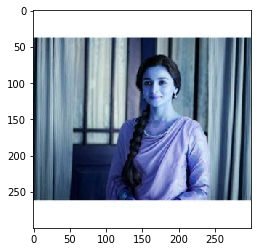

(300, 300, 3)
1393


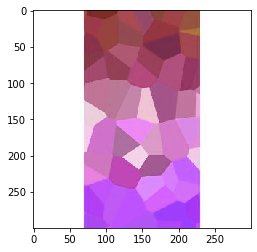

(300, 300, 3)
0


(1517,)

In [2]:
#loading training and validation data


DATADIR = "D:/dataset1/train"
CATEGORIES = ["non-notes","notes"]
IMG_SIZE = 300

for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to notes or non-notes dir
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    

print(img_array.shape)

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) #path to notes or non-notes dir
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

print(len(training_data))



X_train=[]
Y_train=[]

for features,label in training_data:
    X_train.append(features)
    Y_train.append(label)
    
X_train=np.array(X_train).reshape(-1,300,300,3)
Y_train=np.array(Y_train).reshape(-1)

import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train,pickle_out)
pickle_out.close()

pickle_in=open("X_train.pickle","rb")
X_train=pickle.load(pickle_in)

X_train[8]

pickle_in=open("Y_train.pickle","rb")
Y_train=pickle.load(pickle_in)

Y_train.shape


DATADIR = "D:/dataset1/val"
CATEGORIES = ["non-notes","notes"]
IMG_SIZE = 300

for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to notes or non-notes dir
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    

print(img_array.shape)

val_data=[]
def create_val_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) #path to notes or non-notes dir
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
            
create_val_data()

print(len(val_data))



X_val=[]
Y_val=[]

for features,label in training_data:
    X_val.append(features)
    Y_val.append(label)
    
X_val=np.array(X_val).reshape(-1,300,300,3)
Y_val=np.array(Y_val).reshape(-1)

import pickle

pickle_out = open("X_val.pickle","wb")
pickle.dump(X_val,pickle_out)
pickle_out.close()

pickle_out = open("Y_val.pickle","wb")
pickle.dump(Y_val,pickle_out)
pickle_out.close()

pickle_in=open("X_val.pickle","rb")
X_val=pickle.load(pickle_in)

X_val[8]

pickle_in=open("Y_val.pickle","rb")
Y_val=pickle.load(pickle_in)

Y_val.shape

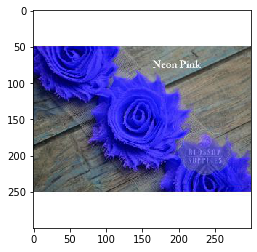

(300, 300, 3)
51


(51,)

In [3]:
#loading test data

DATADIR = "D:/dataset1/test"
CATEGORIES = ["testset"]
IMG_SIZE=300

for category in CATEGORIES:
    path=os.path.join(DATADIR,category) #path to test dir
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
       

print(img_array.shape)

test_data=[]
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) #path to test dir
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([img_array, class_num])
            except Exception as e:
                pass
            
create_test_data()

print(len(test_data))



X_test=[]
Y_test=[]

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)
    
X_test=np.array(X_test).reshape(-1,300,300,3)
Y_test=np.array(Y_test).reshape(-1)
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test,pickle_out)
pickle_out.close()

pickle_in=open("X_test.pickle","rb")
X_test=pickle.load(pickle_in)
X_test.shape

pickle_in=open("Y_test.pickle","rb")
Y_test=pickle.load(pickle_in)
Y_test.shape

In [11]:
#model architecture....

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
# model summary....

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 256)       295168    
__________

In [13]:
from tensorflow.keras.optimizers import RMSprop

# compiling model

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define our example directories and files
train_dir = "D:/dataset1/train"
validation_dir = "D:/dataset1/val"

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 50,
                                                    class_mode = 'binary', 
                                                    target_size = (300, 300))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (300, 300))

Found 1416 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [15]:
# Define a Callback class that stops training once accuracy reaches 98.5%
# in  this model it never reached that accuracy


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.985):
      print("\nReached 98.5% accuracy so cancelling training!")
      self.model.stop_training = True


In [16]:
# had to import this since cell below was not getting excuted

from IPython.display import display
from PIL import Image

In [17]:
callbacks = myCallback()


#training the model

history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 20,
            validation_steps = 20,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/20
7/7 [==============================] - 7s 986ms/step - loss: 1.2925 - acc: 0.8968
 - 142s - loss: 3.0327 - acc: 0.5897 - val_loss: 1.2925 - val_acc: 0.8968
Epoch 2/20
7/7 [==============================] - 7s 1s/step - loss: 0.8137 - acc: 0.9048
 - 128s - loss: 0.9963 - acc: 0.8835 - val_loss: 0.8137 - val_acc: 0.9048
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.4858 - acc: 0.9444
 - 204s - loss: 0.6893 - acc: 0.8856 - val_loss: 0.4858 - val_acc: 0.9444
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.4432 - acc: 0.9683
 - 196s - loss: 0.5361 - acc: 0.8997 - val_loss: 0.4432 - val_acc: 0.9683
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.3450 - acc: 0.9683
 - 226s - loss: 0.4715 - acc: 0.9145 - val_loss: 0.3450 - val_acc: 0.9683
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.3733 - acc: 0.9206
 - 221s - loss: 0.3766 - acc: 0.9280 - val_loss: 0.3733 - val_acc: 0.9206
Epoch 7/20
7

In [20]:
#saving the entire model
#which includes saving model architecture  ,model weights, training configuration( ie, optimizers, loss)

model.save('notes_model.h5')

In [21]:

#testing model on testset

val_loss,val_acc=model.evaluate(X_test,Y_test)
print(val_loss,val_acc)

51/51 [==============================] - 2s 35ms/sample - loss: 0.6320 - acc: 0.8627
0.6320489300232307 0.8627451


In [27]:
# saving model weights...individually also

model.save_weights('notes_model_weights.h5')

In [29]:
from sklearn.metrics import confusion_matrix

In [36]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.80)
c_matrix = confusion_matrix(Y_test, y_pred)

In [37]:
c_matrix

array([[48,  3],
       [ 0,  0]], dtype=int64)